# **P4DS Final Project: An Analysis On Global Warming**
Huy G. Tong $^{1 *}$ \
$^{1}$ *Faculty of Information Technology, VNUHCM - University of Science, Vietnam*\
$^{*}$ *Student ID: 21127307*


#### **ABSTRACT**
To be written later.

#### **1. INTRODUCTION**

To be written later.

#### **2. METHOD**

In this section, I will describe in detail the steps used to perform the analysis on the dataset. I will also give a brief description of the data used in this project, as well as include the codes to help derive insightful information.

First, let us import the necessary packages, be sure to run the bellow cell at least once when executing this Notebook.


In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt

#### **2.1 Data**

In [36]:
globtemp = pd.read_csv("data/GlobalTemperatures.csv")
country_surftemp = pd.read_csv("data/GlobalLandTemperaturesByCountry.csv")
country_co2_emission = pd.read_csv("data/co2_emissions_kt_by_country.csv")

#### **2.2 Preprocessing**

In [37]:
globtemp = globtemp.dropna(axis=0)
country_surftemp = country_surftemp.dropna(axis=0)
country_co2_emission = country_co2_emission.dropna(axis=0)

In [38]:
globtemp_annual = globtemp.copy()
globtemp_annual["dt"] = pd.to_datetime(globtemp_annual["dt"], format="%Y-%m-%d").dt.year
globtemp_annual = globtemp_annual.groupby("dt").mean().reset_index()

In [39]:
country_surftemp_annual = country_surftemp.copy()
country_surftemp_annual["dt"] = pd.to_datetime(country_surftemp_annual["dt"], format="%Y-%m-%d").dt.year
country_surftemp_annual = country_surftemp_annual.groupby(["dt", "Country"]).mean().reset_index()
country_surftemp_annual

,dt,Country,AverageTemperature,AverageTemperatureUncertainty
0,1743,Albania,8.62000,2.268000
1,1743,Andorra,7.55600,2.188000
2,1743,Austria,2.48200,2.116000
3,1743,Belarus,0.76700,2.465000
4,1743,Belgium,7.10600,1.855000
...,...,...,...,...
45910,2013,Western Sahara,23.74425,1.133125
45911,2013,Yemen,28.12975,1.335000
45912,2013,Zambia,21.19600,0.825125
45913,2013,Zimbabwe,20.71075,0.778500


In [40]:
country_co2_emission["year"] = pd.to_datetime(country_co2_emission["year"], format="%Y").dt.year
co2_emission_annual = country_co2_emission[["year", "value"]]
co2_emission_annual = co2_emission_annual.groupby("year").mean().reset_index()

#### **2.3 Analysis**

note questions:
- how has the global temperature changed throughout the years?
- temp and gas: what is the relation?

#### **2.3.1 Global surface temperature trend**

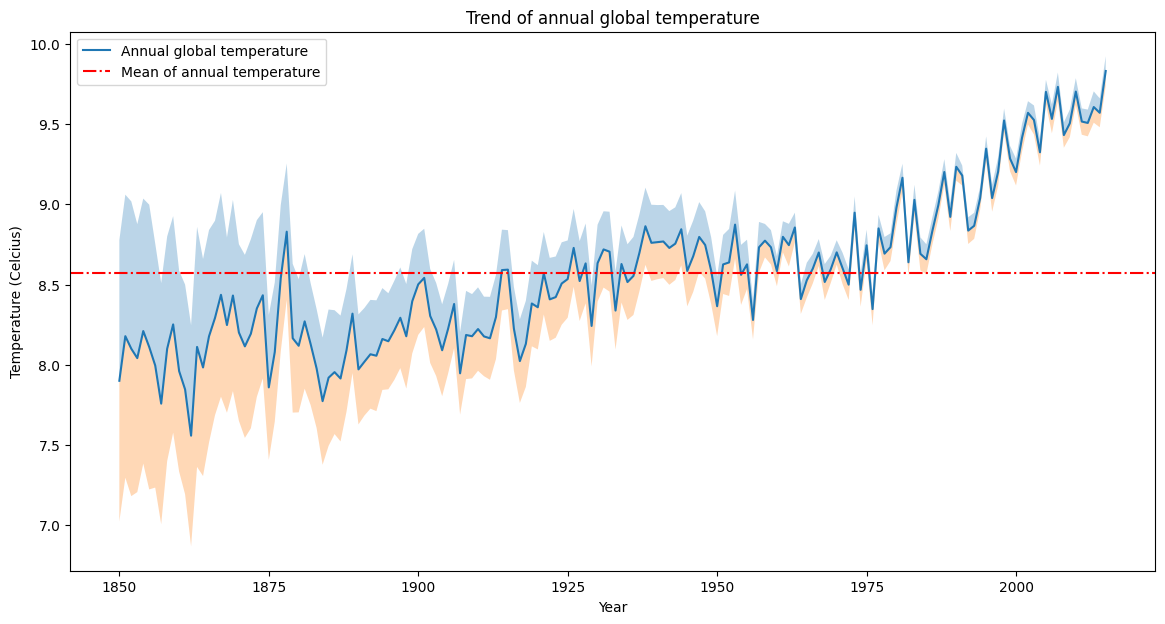

In [41]:
# Plot the annual temperature

years = globtemp_annual["dt"]

annual_avg = globtemp_annual["LandAverageTemperature"]
annual_uncertainty = globtemp_annual["LandAverageTemperatureUncertainty"]

plt.plot(years, annual_avg, label="Annual global temperature")
plt.fill_between(years, annual_avg, annual_avg + annual_uncertainty, alpha=0.3)
plt.fill_between(years, annual_avg, annual_avg - annual_uncertainty, alpha=0.3)

plt.axhline(annual_avg.mean(), color="red", linestyle="-.", label="Mean of annual temperature")

plt.xlabel("Year")
plt.ylabel("Temperature (Celcius)")
plt.title("Trend of annual global temperature")
plt.legend()

fig = plt.gcf()
fig.set_size_inches((14, 7))

plt.show()

#### **2.3.2. Global warming: temperature and greenhouse gas**

sync 2 datasets

In [42]:
globtemp_year_min = globtemp_annual["dt"].min()
globtemp_year_max = globtemp_annual["dt"].max()

co2_emission_year_min = co2_emission_annual["year"].min()
co2_emission_year_max = co2_emission_annual["year"].max()

start_year = max(globtemp_year_min, co2_emission_year_min)
end_year = min(globtemp_year_max, co2_emission_year_max)

print(f"-- Matched data start at year {start_year}")
print(f"-- Matched data end at year {end_year} inclusive")
print(f"-- Total of {end_year - start_year + 1} years")

-- Matched data start at year 1960
-- Matched data end at year 2015 inclusive
-- Total of 56 years


In [43]:
globtemp_matched = globtemp_annual.loc[globtemp_annual["dt"] >= start_year]
globtemp_matched = globtemp_matched.loc[globtemp_matched["dt"] <= end_year]

co2_emission_matched = co2_emission_annual.loc[co2_emission_annual["year"] >= start_year]
co2_emission_matched = co2_emission_matched.loc[co2_emission_matched["year"] <= end_year]


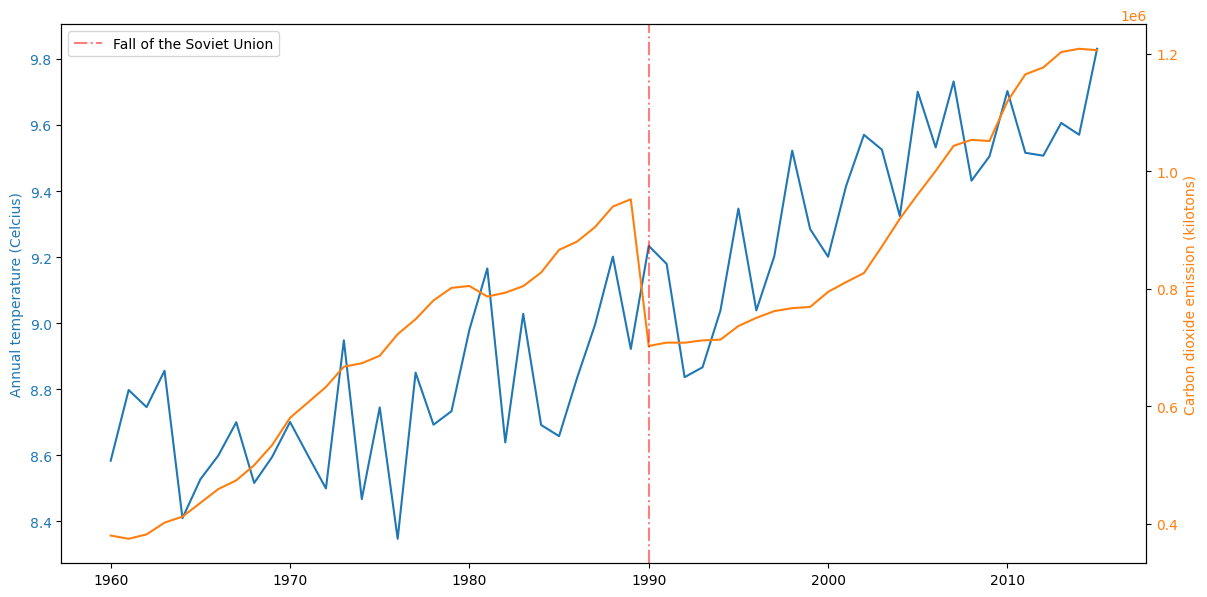

In [44]:
matched_years = np.arange(start_year, end_year + 1)

fig, ax_temp = plt.subplots()

ax_temp.plot(matched_years, globtemp_matched["LandAverageTemperature"], color="tab:blue")
ax_temp.set_ylabel("Annual temperature (Celcius)", color="tab:blue")
ax_temp.tick_params(axis='y', labelcolor="tab:blue")

ax_co2 = ax_temp.twinx()
ax_co2.plot(matched_years, co2_emission_matched["value"], color="tab:orange")
ax_co2.set_ylabel("Carbon dioxide emission (kilotons)", color="tab:orange")
ax_co2.tick_params(axis='y', labelcolor="tab:orange")

plt.axvline(1990, color="red", alpha=0.5, linestyle="-.", label="Fall of the Soviet Union")

plt.legend()

fig = plt.gcf()
fig.set_size_inches((14, 7))

plt.show()

#### **3. CONCLUSION**

#### **REFERENCES**